In [1]:
#Importamos bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
import seaborn as sns

In [3]:
data = pd.read_excel(r"./demandaHistorica.xlsx")
data.head()

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
0,2012,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222628,2012-01-01
1,2012,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536858,2012-01-01
2,2012,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336297,2012-01-01
3,2012,1,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601066,2012-01-01
4,2012,1,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076618,2012-01-01


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122263 entries, 0 to 122262
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   anio                122263 non-null  int64         
 1   mes                 122263 non-null  int64         
 2   agente_nemo         122263 non-null  object        
 3   agente_descripcion  122263 non-null  object        
 4   tipo_agente         122263 non-null  object        
 5   region              122263 non-null  object        
 6   provincia           122263 non-null  object        
 7   categoria_area      122263 non-null  object        
 8   categoria_demanda   122263 non-null  object        
 9   tarifa              122263 non-null  object        
 10  categoria_tarifa    122263 non-null  object        
 11  demanda_MWh         122263 non-null  int64         
 12  indice_tiempo       122263 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3

In [4]:
data.describe()

,anio,mes,demanda_MWh
count,122263.000000,122263.000000,1.222630e+05
mean,2015.434776,6.373637,8.560247e+06
std,2.201872,3.469122,3.821235e+07
min,2012.000000,1.000000,-2.537772e+07
25%,2014.000000,3.000000,2.344730e+05
50%,2015.000000,6.000000,1.101442e+06
75%,2017.000000,9.000000,3.915329e+06
max,2020.000000,12.000000,1.572308e+09


In [5]:
data.shape

(122263, 13)

# Histograma y Scatterplot de demanda por mes

In [42]:
#Generación del dataframe

data2 = data.groupby('indice_tiempo').demanda_MWh.sum()
data2 = data2.to_frame().reset_index()
data2['indice_tiempo'] = pd.to_datetime(data2['indice_tiempo'])

# Create a new column for year-month
data2['YearMonth'] = data2['indice_tiempo'].dt.to_period('M')

data2.drop('indice_tiempo', axis=1, inplace=True)

# Reorder columns
data2 = data2[['YearMonth', 'demanda_MWh']]

# Group by 'YearMonth' and calculate some aggregate function (e.g., sum)
result = data2.groupby('YearMonth')['demanda_MWh'].sum()
result = result.to_frame().reset_index()

result


,YearMonth,demanda_MWh
0,2012-01,9957519285
1,2012-02,9501232118
2,2012-03,8769373773
3,2012-04,8353950602
4,2012-05,9200213094
...,...,...
93,2019-10,9835428445
94,2019-11,10105629895
95,2019-12,9680243683
96,2020-01,10440000393


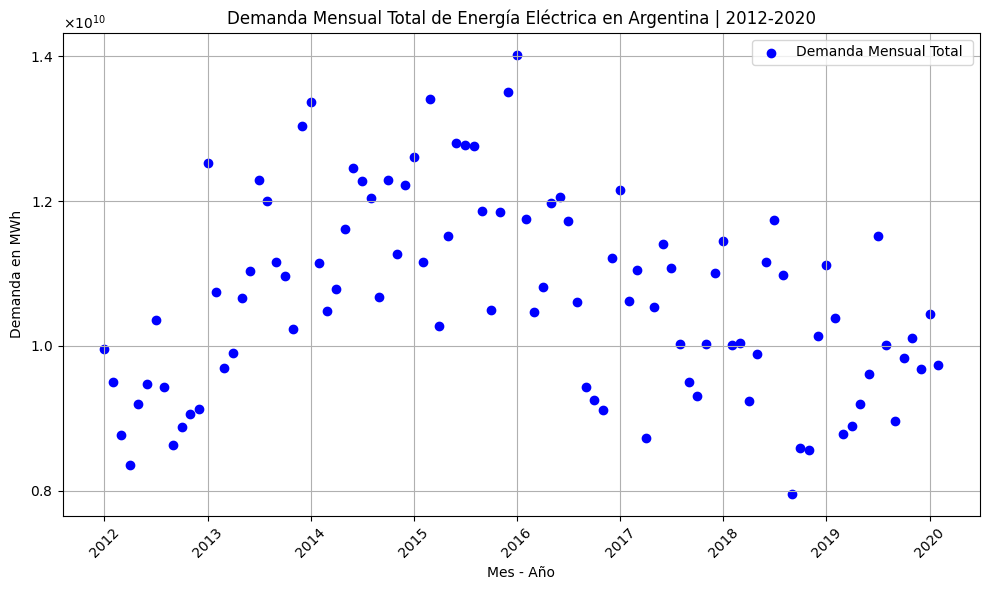

In [64]:
# Convertir la columna de fecha de Period a datetime
result['YearMonth'] = pd.to_datetime(result['YearMonth'].astype(str))

# Crear el scatter plot
plot.figure(figsize=(10, 6))  # Tamaño de la figura
plot.scatter(result['YearMonth'], result['demanda_MWh'], color='blue', marker='o', label='Demanda Mensual Total ')

# Personalizar el gráfico
plot.title('Demanda Mensual Total de Energía Eléctrica en Argentina | 2012-2020')
plot.xlabel('Mes - Año')
plot.ylabel('Demanda en MWh')
plot.grid(True)

# Rotar las etiquetas del eje x para que se vean mejor
plot.xticks(rotation=45)

# Cambiar las etiquetas del eje y para mostrar números completos
ax = plot.gca()
ax.yaxis.set_major_formatter(plot.ScalarFormatter(useMathText=True, useOffset=False))

# Establecer el número máximo de etiquetas en el eje y (ajústalo según tus preferencias)
ax.locator_params(axis='y', nbins=5)

# Mostrar una leyenda
plot.legend()

# Mostrar el gráfico
plot.tight_layout()  # Para ajustar el diseño y evitar cortes en etiquetas
plot.show()

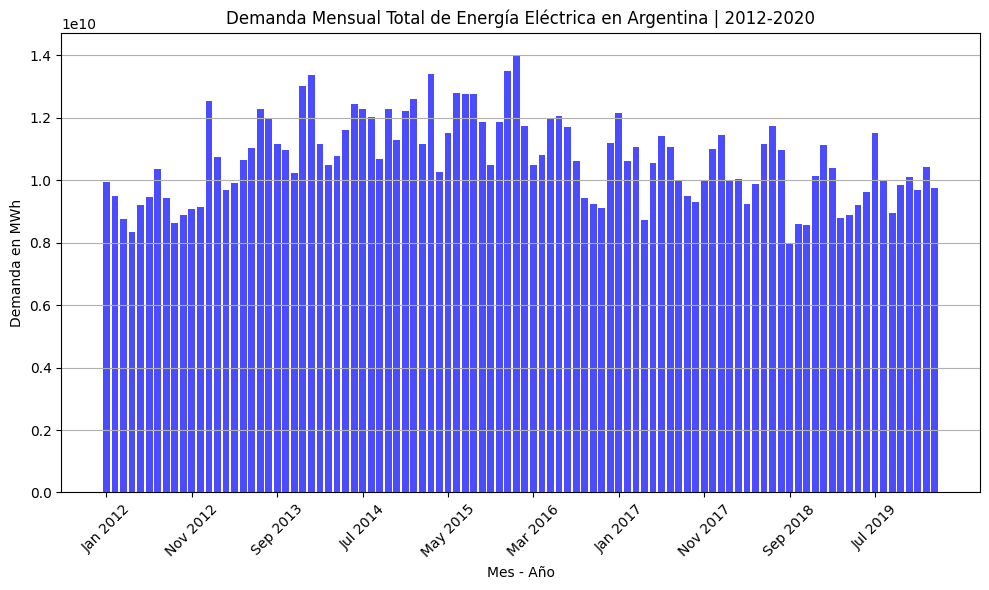

In [76]:
# Extraer el año y el mes de la columna 'YearMonth'
result['Year'] = pd.to_datetime(result['YearMonth']).dt.year
result['Month'] = pd.to_datetime(result['YearMonth']).dt.strftime('%b %Y')

# Crear el histograma
plot.figure(figsize=(10, 6))
plot.bar(result['Month'], result['demanda_MWh'], color='blue', alpha=0.7)

# Personalizar el gráfico
plot.title('Demanda Mensual Total de Energía Eléctrica en Argentina | 2012-2020')
plot.xlabel('Mes - Año')
plot.ylabel('Demanda en MWh')
plot.grid(axis='y')

# Rotar las etiquetas del eje x para una mejor legibilidad
# Reducir la cantidad de etiquetas en el eje X
tick_spacing = 10  # Espacio entre etiquetas en el eje X
plot.xticks(np.arange(0, len(result.index), tick_spacing), result['Month'][::tick_spacing], rotation=45)


# Mostrar el gráfico
plot.tight_layout()
plot.show()